# Evapotranspiration after Haude et al. (1954)

Content (jump to): [Parameters](#ID1), [Calculation of ETP](#ID2)

## Haude Formula

$$ETP = k * E * ( 1 - \frac{F}{100}) \leq 7$$

k...monthly changing crop coefficiant $[\frac{mm}{d*hPa}]$<br>
E... extraterestrial radiation $[hPa]$ <br>
F...relative humidity $[\%]$<br>

In [88]:
# reading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
# load the data (for Graz (Austria))
data = pd.read_excel('DATA\ETP_data.xlsx', index_col='datum', parse_dates=True)

<a id='ID1'></a>
## Parameters

### Haude factor: *k* $[\frac{mm}{d*hPa}]$
A factor considering the monthly crop. 

In [90]:
moy = list(data.index.month) # array with the month of every day in the year
k_values = [0.22, 0.22, 0.22, 0.29, 0.29, 0.28, 0.26, 0.25, 0.23, 0.22, 0.22, 0.22] # variable coefficient for every month of the year
k = np.array([k_values[i-1] for i in moy]) # creates an array with a k - value for every day of the year, that now can be used to calculate ETP


### Saturation vapour pessure: *E* $[hPa]$
At 14:00 pm, depending on the air temperatur at 14:00 pm.




In [91]:
# The messurements are providet within the ETP_data.xlsx.

T_14 = data['T_14'].values #T_14... temperature of the day at 14:00

E = 6.108 * 10**((7.5 * T_14)/(237.3 + T_14))

### Relative humidity: *F* $[\%]$
At 14:00 pm.

In [92]:
F_rel_14 = data['F_rel_14'].values 

<a id='ID1'></a>
## Calculation of ETP

In [93]:
# To calculate the potential evapotranspiration (ETP_haude) we will use a formula by Haude et al. (1954)

ETP_haude = k * E * (1 - (F_rel_14 / 100)) # haude - formula
ETP_haude = np.where(ETP_haude < 7, ETP_haude, 7)  # Cap values at 7 where condition is met



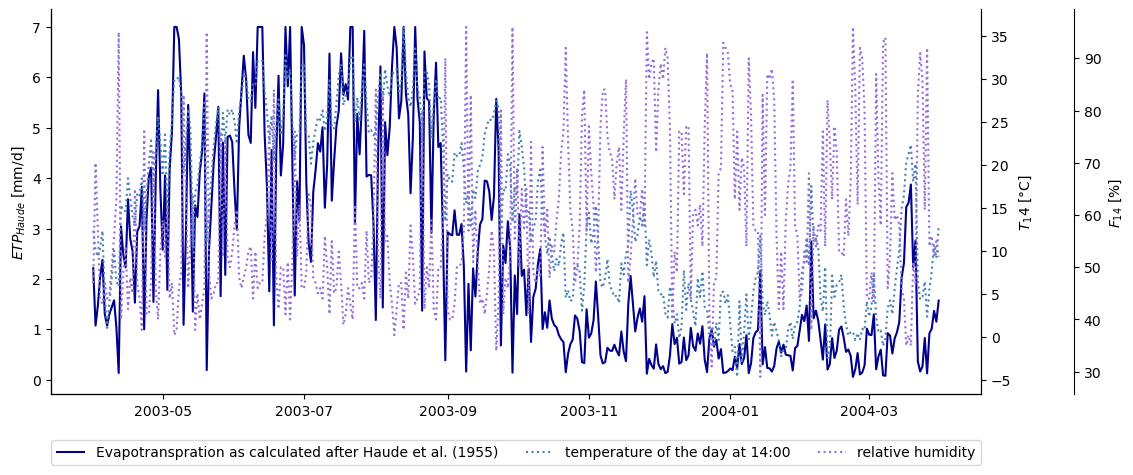

In [94]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12,5))

## plot the ETP
l1=ax.plot(data.index, ETP_haude, color='darkblue', label='Evapotranspration as calculated after Haude et al. (1955)')
ax.set_ylabel('$ETP_{Haude}$ [mm/d]')
## plot the extraterrestrial radiation
ax2=ax.twinx()
l2=ax2.plot(data.index, T_14, color='steelblue', label='temperature of the day at 14:00', ls=':')
ax2.set_ylabel(r'$T_14$ [°C]')
## plot temperature
ax3=ax.twinx()
ax3.spines.right.set_position(("axes", 1.1))
l3=ax3.plot(data.index, F_rel_14, color='mediumpurple', label='relative humidity', ls=':')
ax3.set_ylabel(r'$F_{14}$ [%]')


ax.legend(handles = l1+l2+l3, bbox_to_anchor=(0.5, -0.1), loc="upper center", fancybox=True, ncol=4)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)